#**NAIVE BAYES Y KNN**

##**TEOREMA DE BAYES**

El Teorema de Bayes es una fórmula de probabilidad condicional. Básicamente nos permite actualizar la probabilidad de que algo sea cierto cuando obtenemos nueva información.

> La probabilidad condicional, también llamada probabilidad condicionada, es una medida estadística que indica la probabilidad de que ocurra un evento A si otro evento B ha sucedido.

>Es decir, la probabilidad condicional P(A|B) se refiere a cuánto de probable es que suceda el evento A una vez ya se ha producido el evento B.

**Como lo vemos en este tema?**

En aprendizaje supervisado, queremos predecir una etiqueta (Y) en función de características (X).
Por ejemplo: predecir si un correo es spam o no spam según las palabras que contiene.

---

---

En otras palabras, si tenemos una hipótesis (algo que crees que puede pasar) y evidencia (información que observas), el teorema de Bayes nos ayuda a calcular la probabilidad de que la hipótesis sea cierta dado lo observado.

**Cómo interpretarlo**

* Empezamos con una creencia inicial sobre algo (P(A)).

* Obtenemos nueva evidencia (𝐵).

* Actualizamos lss creencias usando la fórmula para obtener P(A∣B), la probabilidad ajustada.

**Formula:**

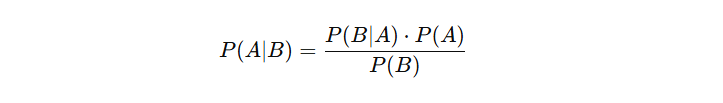

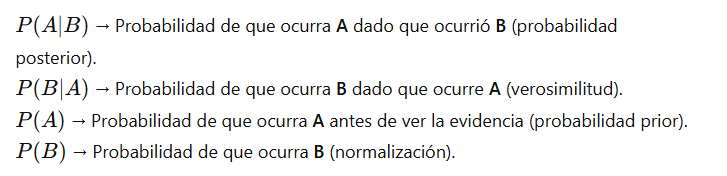

**Ejemplo ilustrativo**

**Supongamos que:**

* Queremos saber la probabilidad de que alguien tenga una enfermedad (𝐴).

* Sabemos que se hizo un test y salió positivo (𝐵).

**Si:**

1. El 1% de la población tiene la enfermedad (P(A)=0.01)

2. El test acierta el 99% de las veces si la persona tiene la enfermedad (P(B∣A)=0.99)

3. El test da positivo el 5% de veces aunque la persona no tenga la enfermedad (P(B)=0.05)

**Entonces:**

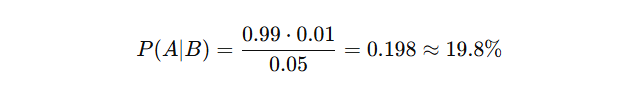

**Entonces:**
Aunque el test salió positivo, la probabilidad de que la persona realmente tenga la enfermedad es ~20%, porque la enfermedad es muy rara.

##**NAIVE BAYES**

**Naive Bayes** es una familia de clasificadores probabilísticos **basados en el Teorema de Bayes** que calcula la probabilidad posterior de cada clase dada una observación.

* Se llama naive (ingenuo) porque asume independencia condicional entre las características: dado el valor de la clase, cada característica es independiente de las demás.

* Aunque esa suposición rara vez es exacta en la práctica, el algoritmo suele funcionar muy bien, especialmente cuando las dimensiones son muchas o hay ruido.

Es rápido de entrenar (simple conteo/estimación de parámetros) y adecuado para problemas de texto, spam, clasificación básica y cuando se requieren predicciones rápidas con recursos limitados.

Además permite calcular probabilidades explícitas de pertenencia a cada clase (no sólo una etiqueta).

---
**Nota contextual:**

Un clasificador es un algoritmo que aprende a asignar etiquetas o clases a los datos.

Por ejemplo:

* Decidir si un correo es spam o no spam

* Si una imagen es de un gato, perro o pájaro

* Si un paciente tiene una enfermedad o no

Entonces, dado un conjunto de características 𝑋, el modelo predice una clase 𝑌.

**Ahora, un clasificador probabilístico** no solo dice qué clase gana, sino con qué probabilidad pertenece el dato a cada clase.

* Es decir, no solo responde: “Este correo es spam.”

* Sino también: “Este correo es spam con una probabilidad del 80%, y no spam con una probabilidad del 20%.”

---

####**AREAS DE APLICACION**

* Filtrado de spam y clasificación de correos (modelo multinomial NB).

* Clasificación de documentos y análisis de sentimiento (multinomial / Bernoulli NB).

* Problemas médicos con variables continuas (a veces Gaussian NB).

* Bases con muchas features y pocos datos por clase (cuando overfitting sería problema para modelos complejos).

####**Implementación en Python — parámetros clave**

      from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

**GaussianNB**

* **priors:** lista de probabilidades a priori por clase (si no, se calculan a partir de los datos).

* **var_smoothing:** pequeña fracción añadida a la varianza para estabilidad numérica; evita división por 0 y suaviza - útil con varianzas muy pequeñas.

**MultinomialNB (útil para conteos/TF-IDF)**

* **alpha:** Laplace smoothing (regularización). Si alpha=1 es smoothing Laplace; alpha=0 es sin suavizado (riesgo de prob 0).

* **fit_prior:** si True, aprende probabilidades a priori; False usa uniformes.

**BernoulliNB (para features binarias)**

* **binarize:** umbral para convertir características en 0/1 si entran como continuas.


---

**EJERCICIO**

--------------------------------------------------------------------------------------------------------------
Tamaño dataset: (150, 5)
--------------------------------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


--------------------------------------------------------------------------------------------------------------
Distribución por clase:
target
0    50
1    50
2    50
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------


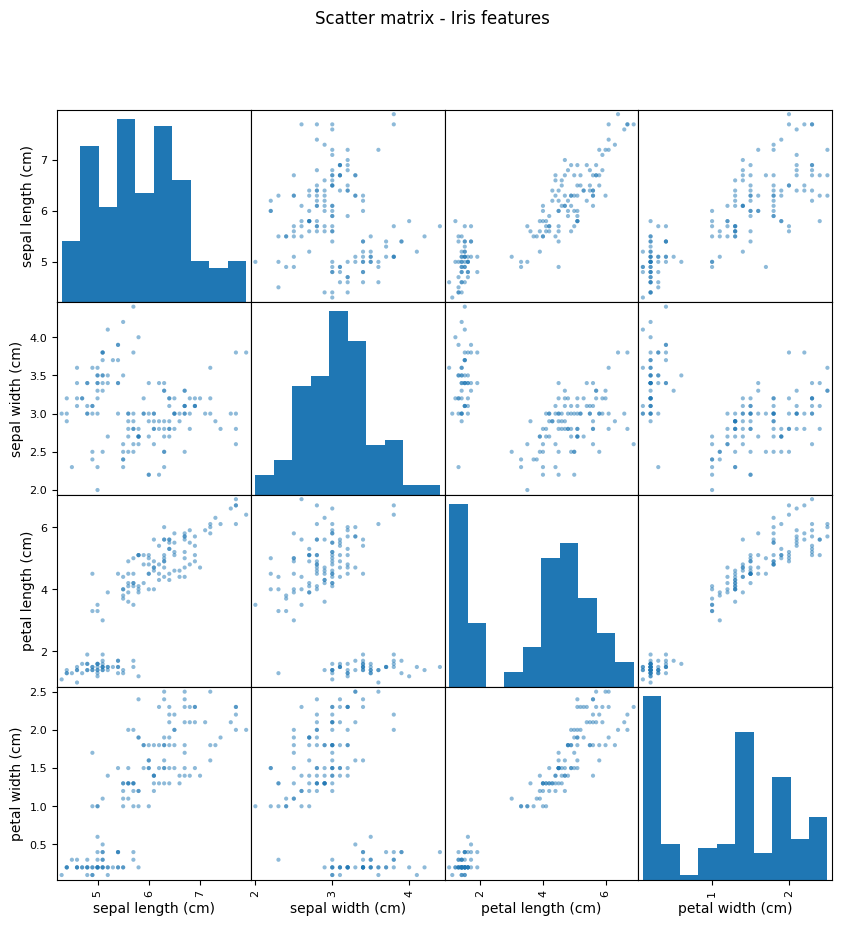

--------------------------------------------------------------------------------------------------------------
Precision: 0.9210526315789473
--------------------------------------------------------------------------------------------------------------

Reporte clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

--------------------------------------------------------------------------------------------------------------
Matriz de confusión:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
--------------------------------------------------------------------------------------------------------------
CV accuracy (5-fold): [0.96666667 0.96666667 0.93333333 0.9666

In [1]:
# Ejercicio A: Naive Bayes (GaussianNB) con dataset Iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Carga de los datos
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print('-'*110)
print("Tamaño dataset:", df.shape)
print('-'*110)
display(df.head())

# 2) EDA simple ()
print('-'*110)
print("Distribución por clase:")
print(df['target'].value_counts())
print('-'*110)

# Visualización rápida
pd.plotting.scatter_matrix(df[iris.feature_names], figsize=(10,10))
plt.suptitle("Scatter matrix - Iris features")
plt.show()
print('-'*110)

# 3) Train/Test split estratificado (para mantener proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# 4) Definir y entrenar GaussianNB
gnb = GaussianNB(var_smoothing=1e-9)  # var_smoothing por estabilidad numérica
gnb.fit(X_train, y_train)

# 5) Predicciones
y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)  # probabilidades por clase

# 6) Evaluación
print("Precision:", accuracy_score(y_test, y_pred))
print('-'*110)
print("\nReporte clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print('-'*110)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print('-'*110)

# 7) Cross-Validation para obtener estimación más robusta
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
print("CV accuracy (5-fold):", cv_scores, "mean:", np.mean(cv_scores))


* **Usamos GaussianNB** porque las features (longitudes/anchos) son continuas y aproximables por normales.

* **var_smoothing** previene problemas cuando la varianza es muy pequeña.

* **Métrica principal:** accuracy y classification report (precision/recall/F1 por clase) porque Iris está balanceado.

* **Si hubiera desequilibrio, preferiríamos F1 o recall**/precision según el coste de error.

**Preguntas a responder:**

1. ) Que problemas pueden haber cuando la varianza es muy pequeña? den ejemplos.

2. ) Que es EDA?, como se aplica y porque es importante. Den ejemplos.

---

**EJERCICIO VARIANTE 1 - Gaussian Naive Bayes**

Imagina que trabajas en el departamento de biología de una universidad.
El laboratorio ha recolectado cientos de muestras de flores Iris, y los estudiantes deben clasificarlas en tres especies:

* Iris setosa

* Iris versicolor

* Iris virginica

Cada flor tiene medidas de:

* Longitud del sépalo

* Ancho del sépalo

* Longitud del pétalo

* Ancho del pétalo

El problema es que medir está bien, pero clasificar manualmente cientos de flores no lo está.
El equipo quiere un modelo automático que prediga la especie basándose en esas medidas.

Como las variables son continuas (valores decimales) y las clases son discretas, Naive Bayes Gaussiano (GaussianNB) es una excelente opción.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

dataset = load_iris()
X = dataset.data
y = dataset.target

#Creamos el DATAFRAME
df = pd.DataFrame(X, columns=dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#EDA
print(df.info())
print(df.head())
print(df.describe())

#CREAMOS EL MODELO GAUSSIAN

modelo = GaussianNB() #Aqui se creo
modelo.fit(X_train, y_train) #Aqui se entrena con los datos

#CREAR PREDICCIONES
predicciones = modelo.predict(X_test)

#VER METRICAS
exactitud = accuracy_score(y_test, predicciones)
print("Exactitud:", exactitud)

reporte = classification_report(y_test, predicciones, target_names=iris.target_names, zero_division=0)
print("Reporte de clasificación:\n", reporte)

matriz_confusion = confusion_matrix(y_test, predicciones)
print("Matriz de confusión:\n", matriz_confusion)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

**EJERCICIO VARIANTE 2 - Multinomial Naive Bayes**

Imagina que una empresa de tecnología ha desarrollado una plataforma de noticias que recopila artículos de distintas fuentes.

El sistema quiere clasificar automáticamente cada noticia en una de las siguientes categorías:

* Deportes

* Política

Actualmente, los editores hacen esta clasificación a mano, pero el volumen de noticias creció tanto que ya no es posible hacerlo manualmente.

Por tanto, se propone construir un modelo de clasificación automática de texto usando Naive Bayes Multinomial

**EJERCICIO VARIANTE 3 - Bernoulli Naive Bayes**

Imagina que trabajas en un hospital inteligente que quiere ayudar a los médicos a detectar enfermedades comunes con base en síntomas que solo indican presencia o ausencia.

Por ejemplo, el sistema analiza si el paciente tiene fiebre (1) o no tiene fiebre (0), tiene tos (1) o no tiene tos (0), etc.

El objetivo es **construir un modelo que prediga si un paciente tiene gripe o no basándose en estos síntomas binarios.**

**Usaremos el algoritmo Bernoulli Naive Bayes, que:**

* Se adapta a variables booleanas.

* Considera la presencia o ausencia de características como indicadores de clase.

* Es ideal para modelos médicos, filtros de spam o detección de fraude donde la información suele ser binaria.

---

##**K-Nearest Neighbors (KNN)**

**KNN** es un método perezoso (lazy learning) que **no construye un modelo paramétrico en la fase de entrenamiento; en vez de eso, para predecir la etiqueta de un punto nuevo, mira los k puntos de entrenamiento más cercanos y toma la clase mayoritaria (clasificación) o el promedio (regresión).**

> La "cercanía" se define mediante una métrica (p.ej., distancia Euclidiana).

KNN es fácil de entender e implementar, pero puede ser costoso en predicción si el dataset de entrenamiento es grande, ademas, es sensible al escalado de las características y a valores atípicos.

---

> **Para predecir el resultado de un nuevo dato, KNN busca los “K” puntos más cercanos (vecinos) en el conjunto de entrenamiento y decide el resultado según ellos.**

---

####**Áreas de aplicación**

* Problemas donde la decisión local es significativa (p. ej. detección de anomalías, recomendaciones simples).

* Cuando se quiera un método no paramétrico sin suposiciones sobre la forma de la frontera de decisión.

* Baseline rápido para problemas de clasificación/regresión.

---

####**Cómo funciona paso a paso**

1. **Tienes un conjunto de datos con características (X) y etiquetas (Y).**

2. **Cuando llega un nuevo dato, el algoritmo:**

* Calcula la distancia entre este punto y todos los puntos de entrenamiento (usualmente la distancia euclidiana).

* Selecciona los K puntos más cercanos (por ejemplo, los 3 o 5 más cercanos).

  3. **Según el tipo de problema:**

      * **Clasificación:** vota la clase más común entre los vecinos.

      * **Regresión:** calcula el promedio del valor numérico de los vecinos.

---

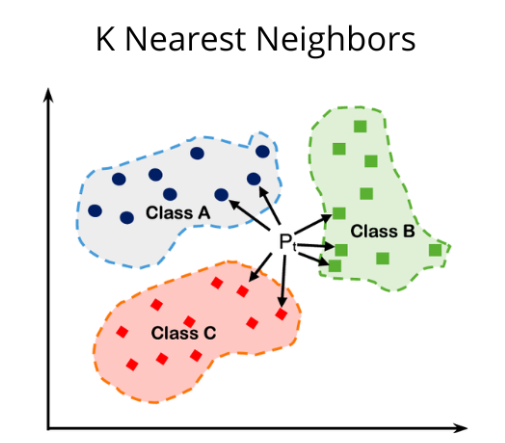

####**Implementación en Python — parámetros clave**

      from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

* **n_neighbors (k):** número de vecinos a considerar.

* **weights:** 'uniform' (votos iguales) o 'distance' (vecinos más cercanos pesan más; votan con 1/d).

* **algorithm:** 'auto', 'ball_tree', 'kd_tree', 'brute' — afecta eficiencia (no resultado).

* **leaf_size:** afecta construcción árboles (BallTree/KDTree) para eficiencia.

* **p:** parámetro de la distancia de Minkowski (p=1 Manhattan, p=2 Euclidean).

* **metric:** nombre de la métrica (e.g., 'minkowski', 'euclidean', 'manhattan').

---

**Ejercicio**

**ADICIONALIDADES:**

* **Escalamos con StandardScaler** porque KNN usa distancias; sin escalado features con mayor rango dominan la distancia.

* **Hiperparámetros importantes:** n_neighbors (k), weights y p. Los probamos por GridSearchCV con scoring='f1' porque:

  * El dataset de cáncer puede tener asimetría en costes (false negatives peligrosos), por eso priorizamos F1 (balance Precision/Recall).

  * También mostramos ROC AUC para ver habilidad del modelo con probabilidades.

* Si el objetivo es minimizar falsos negativos (no detectar cáncer), dar prioridad a recall.

---

####**EJEMPLOS: CLASIFICACION Y REGRESION**

**KNN - CLASIFICACION**

Una empresa financiera desea reducir pérdidas por transacciones fraudulentas. Para ello, quiere identificar operaciones sospechosas utilizando Machine Learning.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

#cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

#dividir los datos
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#crear y entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=80)
modelo.fit(X_train, y_train)

#predecir
y_pred = modelo.predict(x_test)
print(y_pred)

print('-'*50)

print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
--------------------------------------------------
204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Length: 114, dtype: int64


**KNN - REGRESION**

Una agencia inmobiliaria quiere estimar precios de viviendas basándose en características como tamaño, edad y número de habitaciones.

---

##**Métricas: cuáles usar y por qué**

###**CONCEPTOS DE LAS METRICAS - REPASO**

* **Accuracy (Exactitud)=** Es la proporción de predicciones correctas con respecto al total de predicciones. Refleja qué tan bien se desempeña el modelo en general, pero puede ser engañosa si los datos están desbalanceados, ya que un modelo puede tener alta exactitud aun cuando no detecta adecuadamente una de las clases importantes.

* **Precision (Precisión)=** Indica cuán confiable es el modelo cuando predice la clase positiva. Es la proporción de verdaderos positivos respecto a todas las predicciones positivas (incluyendo falsos positivos). Se usa cuando es más costoso clasificar incorrectamente un negativo como positivo, como en un sistema que aprueba transacciones fraudulentas por error.

* **Recall (Sensibilidad o Exhaustividad)=** Es la capacidad del modelo para detectar correctamente la clase positiva. Mide cuántos de los positivos reales fueron identificados. Es especialmente importante en casos donde es crítico no pasar por alto positivos, como detección de cáncer o amenazas de seguridad.

* **Specificity (Especificidad)=** Evalúa la proporción de verdaderos negativos correctamente clasificados como negativos. Es útil cuando se requiere que el modelo no etiquete erróneamente elementos seguros como amenazas, por ejemplo, en controles de acceso o sistemas antispam.

* **F1-Score=** Es la media armónica entre Precision y Recall. Se utiliza cuando se necesita un equilibrio entre identificar la mayoría de los positivos y reducir al mínimo los falsos positivos. Es valiosa cuando las clases están desbalanceadas y Accuracy no representa el rendimiento real del modelo.

* **Matriz de Confusión=** Tabla que resume los resultados de la clasificación mostrando el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Permite identificar qué tipo de errores comete más el modelo y analizar su rendimiento con mayor detalle que una sola métrica.

* **ROC Curve (Curva ROC)=** Gráfica que representa la relación entre la tasa de verdaderos positivos (Recall) y la tasa de falsos positivos para diferentes umbrales de decisión. Permite analizar visualmente qué tan bien separa el modelo las dos clases y comparar distintos modelos.

* **AUC (Área Bajo la Curva ROC)=** Valor numérico que resume la curva ROC. Va de 0 a 1 y mide la capacidad del modelo para diferenciar correctamente entre clases. Mientras más cercano a 1, mejor el desempeño del modelo en distinguir positivos de negativos.

* **Support (Soporte)=** Número real de muestras pertenecientes a cada clase en el conjunto de datos. Es útil para interpretar métricas como Precision, Recall y F1-Score, especialmente cuando hay clases con menos representación.

* **Verdadero Positivo (TP – True Positive) =**
Un Verdadero Positivo es un caso en el que el modelo predice la clase positiva y esa predicción es correcta: el ejemplo realmente pertenece a la clase positiva. En la práctica, TP representa las detecciones correctas que queremos maximizar cuando la clase positiva es la que nos interesa identificar (por ejemplo, detectar correctamente pacientes enfermos, transacciones fraudulentas o correos spam). TP forma parte esencial de métricas como precision y recall.

* **Verdadero Negativo (TN – True Negative)=**
El Verdadero Negativo ocurre cuando el modelo predice la clase negativa y esa predicción coincide con la realidad: el ejemplo no pertenece a la clase positiva. TN indica los aciertos en los casos “no relevantes” o “seguros” (por ejemplo, correos legítimos, usuarios sanos). La combinación de TN con TP determina la exactitud global (accuracy) y la especificidad del modelo.

* **Falso Positivo (FP – False Positive) =**
Un Falso Positivo es un error donde el modelo marca un ejemplo como positivo cuando en realidad es negativo. Este tipo de error significa que el sistema genera una alarma innecesaria: por ejemplo, señalar una transacción legítima como fraude o marcar un correo válido como spam. Los FP son críticos cuando los costos de actuar sobre una falsa alarma son altos (pérdida de servicio, molestia al usuario, coste económico), por lo que en esos casos priorizamos métricas que reduzcan FP (precision alta).

* **Falso Negativo (FN – False Negative) =**
Un Falso Negativo ocurre cuando el modelo predice negativo para un caso que en verdad es positivo. Es decir, el modelo “pasa por alto” un ejemplo que debería haber detectado. Los FN son especialmente peligrosos en contextos donde dejar pasar un positivo tiene consecuencias graves, como en diagnósticos médicos (no detectar una enfermedad) o detección de fraudes (no bloquear una transacción maliciosa). Cuando los FN son muy costosos, priorizamos métricas que aumenten el recall.

* **MAE (Mean Absolute Error – Error Absoluto Medio) =**
MAE es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales. Se calcula sumando |predicción − real| para cada ejemplo y dividiendo por el número de ejemplos. MAE se interpreta en las mismas unidades que la variable objetivo (por ejemplo, dólares o metros) y ofrece una medida directa del error promedio que comete el modelo. Es fácil de entender y menos sensible a valores extremos que el MSE, por lo que se usa cuando se desea una interpretación sencilla del error medio.

* **MSE (Mean Squared Error – Error Cuadrático Medio) =**
MSE es la media de los errores al cuadrado: se elevan al cuadrado las diferencias (predicción − real)², se suman y se dividen por el número de observaciones. Al cuadrar los errores, MSE penaliza mucho más los errores grandes que los pequeños; por eso se usa cuando los grandes fallos son particularmente indeseables o cuando se optimiza con técnicas que benefician la diferenciabilidad (por ejemplo, entrenamiento con gradiente). Matemáticamente es conveniente para el entrenamiento de muchos modelos, pero su unidad es la del objetivo al cuadrado, lo que hace que su interpretación directa sea menos intuitiva que la del MAE.

* **R² (Coeficiente de Determinación) =**
R² mide la proporción de la varianza total de la variable objetivo que el modelo logra explicar. Tomando valores entre menos infinito y 1, un R² cercano a 1 indica que el modelo explica la mayor parte de la variabilidad observada; un R² cercano a 0 sugiere que el modelo no explica mejor que una predicción constante (la media), y un R² negativo significa que el modelo es peor que predecir siempre la media. R² se usa para evaluar el ajuste global en problemas de regresión y ayuda a entender cuánto valor explicativo aporta el conjunto de predictores.

###**MODELOS, MÉTRICAS Y VALORES ESPERADOS**

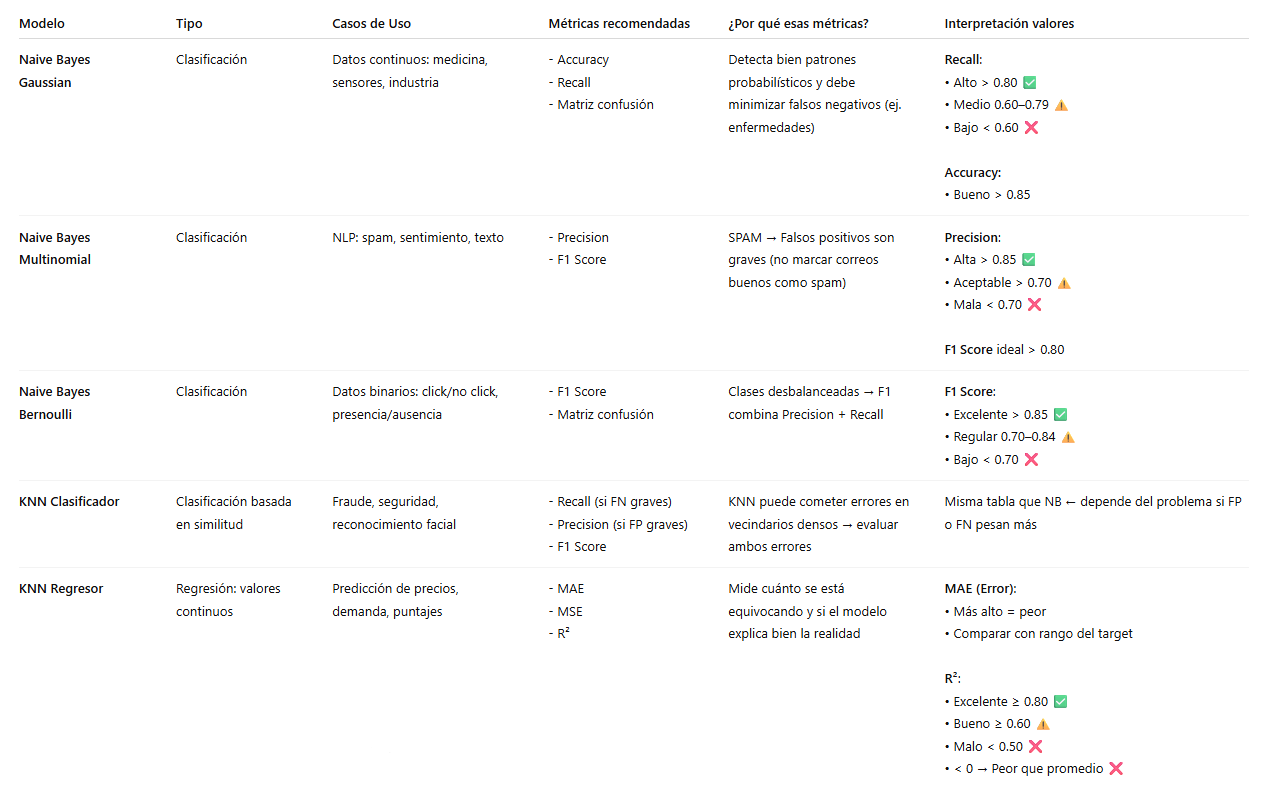

###**Cuándo usar Precision vs Recall?**

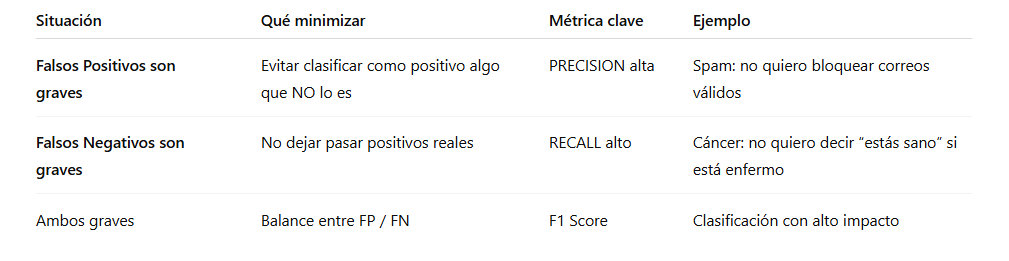

###**Cómo interpretar las métricas con referencia real**

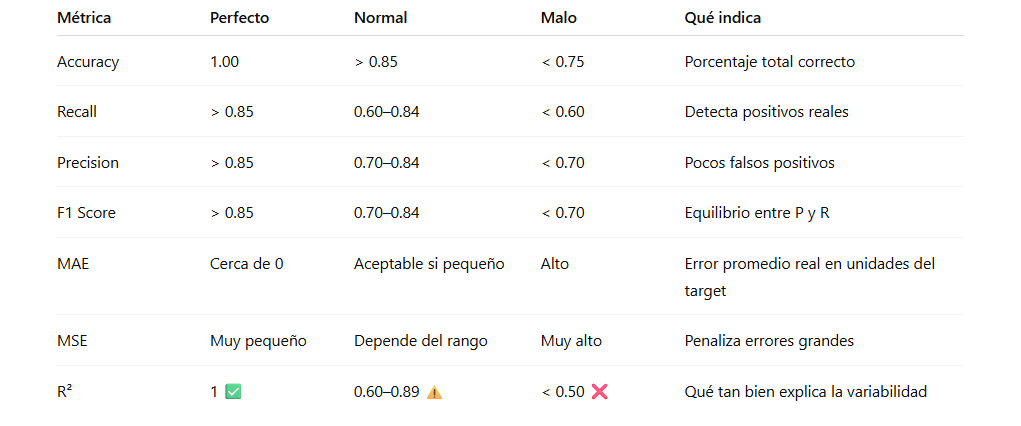